# Tourist Expe Annalysis Project

* EDA / Regression / Classification

* Individual

# Raj Bhagwan Sonar

# **Project Summary -**

# **GitHub Link -**

https://github.com/RajSonar1703/Tourism-Experience-Analytics.git

# **Problem Statement**


Tourism agencies and travel platforms aim to enhance user experiences by leveraging data to provide personalized recommendations, predict user satisfaction, and classify potential user behavior. This project involves analyzing user preferences, travel patterns, and attraction features to achieve three primary objectives: regression, classification, and recommendation.

# Import Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Testing
from scipy import stats

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors

# Recommendation
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

# Load All 10 Files

In [2]:
city = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\City.csv")
continent = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\Continent.csv")
country = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\Country.csv")
item = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\Item.csv")
mode = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\Mode.csv")
region = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\Region.csv")
transaction = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\Transaction.csv")
type_data = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\Type.csv")
updated_item = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\Updated_Item.csv")
user = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\raw\User.csv")

# Data Cleaning


In [3]:
# Check missing values
print(transaction.isnull().sum())
print(user.isnull().sum())

# Fill missing ratings with mean
transaction['Rating'].fillna(transaction['Rating'].mean(), inplace=True)

# Standardize column names
transaction.columns = transaction.columns.str.strip()
user.columns = user.columns.str.strip()

# Remove duplicates
transaction.drop_duplicates(inplace=True)
user.drop_duplicates(inplace=True)

# Fix rating outliers
transaction = transaction[(transaction['Rating'] >= 1) & (transaction['Rating'] <= 5)]

TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
dtype: int64
UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         4
dtype: int64


# Merge All Tables (Feature Engineering)

In [4]:
df = transaction.merge(user, on="UserId", how="left")
df = df.merge(item, on="AttractionId", how="left")
df = df.merge(type_data, on="AttractionTypeId", how="left")
df = df.merge(city, left_on="AttractionCityId", right_on="CityId", how="left")


In [5]:
print(df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'ContinentId', 'RegionId', 'CountryId_x',
       'CityId_x', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'AttractionType', 'CityId_y', 'CityName',
       'CountryId_y'],
      dtype='object')


In [6]:
df.rename(columns={
    "CountryId_y": "CountryId",
    "CityId_y": "CityId"
}, inplace=True)

df.drop(columns=["CountryId_x", "CityId_x"], inplace=True)

In [7]:
df = df.merge(country, on="CountryId", how="left")


In [8]:
print(df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'ContinentId', 'RegionId_x',
       'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'AttractionType', 'CityId', 'CityName',
       'CountryId', 'Country', 'RegionId_y'],
      dtype='object')


In [9]:
df.rename(columns={"RegionId_y": "RegionId"}, inplace=True)
df.drop(columns=["RegionId_x"], inplace=True)
df = df.merge(region, on="RegionId", how="left")


In [10]:
print(df.columns.tolist())

['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode', 'AttractionId', 'Rating', 'ContinentId_x', 'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType', 'CityId', 'CityName', 'CountryId', 'Country', 'RegionId', 'Region', 'ContinentId_y']


In [11]:
print(df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'ContinentId_x', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType',
       'CityId', 'CityName', 'CountryId', 'Country', 'RegionId', 'Region',
       'ContinentId_y'],
      dtype='object')


In [12]:
df.rename(columns={"ContinentId_y": "ContinentId"}, inplace=True)
df.drop(columns=["ContinentId_x"], inplace=True)
df = df.merge(continent, on="ContinentId", how="left")


In [13]:
print(df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'AttractionCityId', 'AttractionTypeId',
       'Attraction', 'AttractionAddress', 'AttractionType', 'CityId',
       'CityName', 'CountryId', 'Country', 'RegionId', 'Region', 'ContinentId',
       'Continent'],
      dtype='object')


In [14]:
print(df["VisitMode"].dtype)
print(mode["VisitMode"].dtype)

int64
object


In [15]:
print(mode.columns.tolist())
print(mode.head())

['VisitModeId', 'VisitMode']
   VisitModeId VisitMode
0            0         -
1            1  Business
2            2   Couples
3            3    Family
4            4   Friends


In [16]:
df = df.merge(mode, left_on="VisitMode", right_on="VisitModeId", how="left")

In [17]:
print(df.columns.tolist())

['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode_x', 'AttractionId', 'Rating', 'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType', 'CityId', 'CityName', 'CountryId', 'Country', 'RegionId', 'Region', 'ContinentId', 'Continent', 'VisitModeId', 'VisitMode_y']


In [18]:
df.rename(columns={"VisitMode_y": "TravelGroupType"}, inplace=True)
df.drop(columns=["VisitMode_x", "VisitModeId"], inplace=True)

In [19]:
print(df.columns.tolist())


['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId', 'Rating', 'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType', 'CityId', 'CityName', 'CountryId', 'Country', 'RegionId', 'Region', 'ContinentId', 'Continent', 'TravelGroupType']


In [20]:
user_attraction_matrix = df.pivot_table(
    index='UserId',
    columns='AttractionId',
    values='Rating'
).fillna(0)

# Hypothesis Testing

* H1: Rating differs by Visit Mode

In [21]:
groups = [df[df['TravelGroupType'] == grp]['Rating'] 
          for grp in df['TravelGroupType'].unique()]

f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA p-value:", p_value)

ANOVA p-value: 1.398089863182327e-29


* H2: Continent affects Rating

In [22]:
print(df['Continent'].value_counts())

Continent
Africa    52930
Name: count, dtype: int64


In [23]:
print(country['Country'].nunique())
print(region['Region'].nunique())
print(continent['Continent'].nunique())

164
22
6


In [24]:
print(df['Continent'].value_counts())

Continent
Africa    52930
Name: count, dtype: int64


In [25]:
print(df.groupby('Continent')['Rating'].count())

Continent
Africa    52930
Name: Rating, dtype: int64


In [26]:
groups = [df[df['TravelGroupType']==g]['Rating'] 
          for g in df['TravelGroupType'].unique()]

stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(35.402874671403964), pvalue=np.float64(1.398089863182327e-29))

In [27]:
df.groupby('TravelGroupType')['Rating'].count()

TravelGroupType
Business      623
Couples     21620
Family      15217
Friends     10945
Solo         4525
Name: Rating, dtype: int64

* H3: Attraction Type influences Rating

In [28]:
groups = [df[df['AttractionType']==t]['Rating'] for t in df['AttractionType'].unique()]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(243.9920518949408), pvalue=np.float64(0.0))

* H4: Year impacts Rating

In [29]:
stats.pearsonr(df['VisitYear'], df['Rating'])

PearsonRResult(statistic=np.float64(-0.006260362019733116), pvalue=np.float64(0.14979057622853806))

* H5: Month impacts Rating

In [30]:
stats.pearsonr(df['VisitMonth'], df['Rating'])

PearsonRResult(statistic=np.float64(0.019217274052427572), pvalue=np.float64(9.800445021425954e-06))

* H6: Business vs Family Rating Difference (T-test)

In [31]:
business = df[df['TravelGroupType'] == 'Business']['Rating']
family = df[df['TravelGroupType'] == 'Family']['Rating']

t_stat, p_value = stats.ttest_ind(business, family)

print("p-value:", p_value)

p-value: 0.014053800312298016


* H7: Region impacts Visit Mode (Chi-Square)

In [32]:
cont_table = pd.crosstab(df['Region'], df['TravelGroupType'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)

print("p-value:", p)

p-value: 1.0


* H8: Country impacts Rating

In [33]:
groups = [df[df['Country']==c]['Rating'] for c in df['Country'].unique()]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(224.00988833495907), pvalue=np.float64(1.5322256100000425e-50))

* H9: Attraction popularity correlates with Rating

In [34]:
popularity = df.groupby('Attraction')['Rating'].count()
avg_rating = df.groupby('Attraction')['Rating'].mean()
stats.pearsonr(popularity, avg_rating)

PearsonRResult(statistic=np.float64(0.11260243750390464), pvalue=np.float64(0.5535616587010295))

* H10: Visit Mode impacts Attraction Type

In [35]:
print(df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId',
       'Rating', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'AttractionType', 'CityId', 'CityName',
       'CountryId', 'Country', 'RegionId', 'Region', 'ContinentId',
       'Continent', 'TravelGroupType'],
      dtype='object')


In [36]:
from scipy import stats
import pandas as pd

cont_table = pd.crosstab(df['TravelGroupType'], df['AttractionType'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)

print("Chi2 value:", chi2)
print("P-value:", p)

Chi2 value: 5978.538770885864
P-value: 0.0


In [37]:
if p < 0.05:
    print("TravelGroupType and AttractionType are dependent")
else:
    print("TravelGroupType and AttractionType are independent")

TravelGroupType and AttractionType are dependent


# 10 Data Visualizations

sns.countplot(data=df, x="VisitMode")
plt.show()


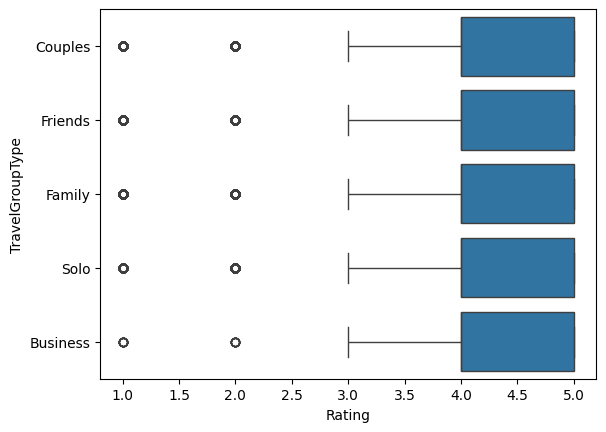

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="Rating", y="TravelGroupType")
plt.show()

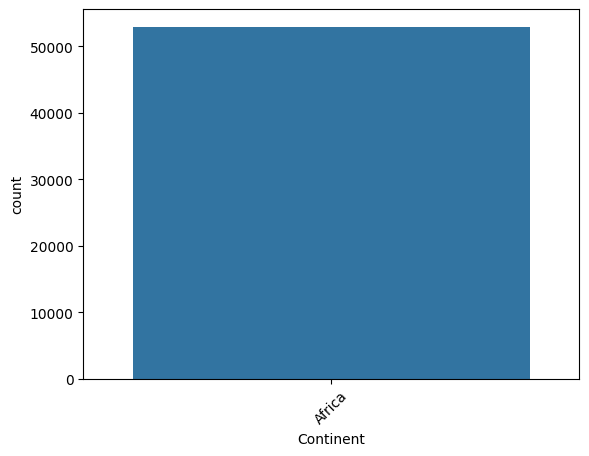

In [39]:
sns.countplot(data=df, x="Continent")
plt.xticks(rotation=45)
plt.show()

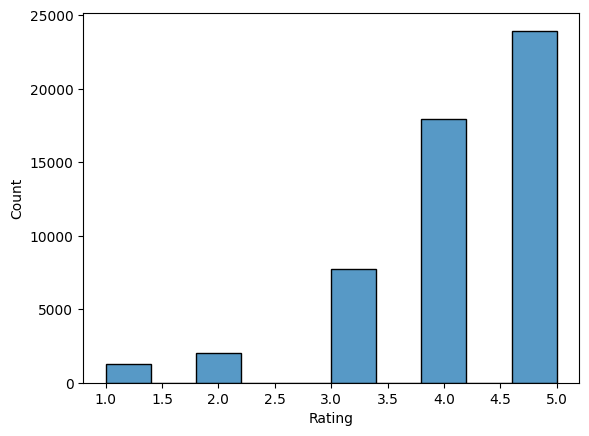

In [40]:
sns.histplot(df['Rating'], bins=10)
plt.show()

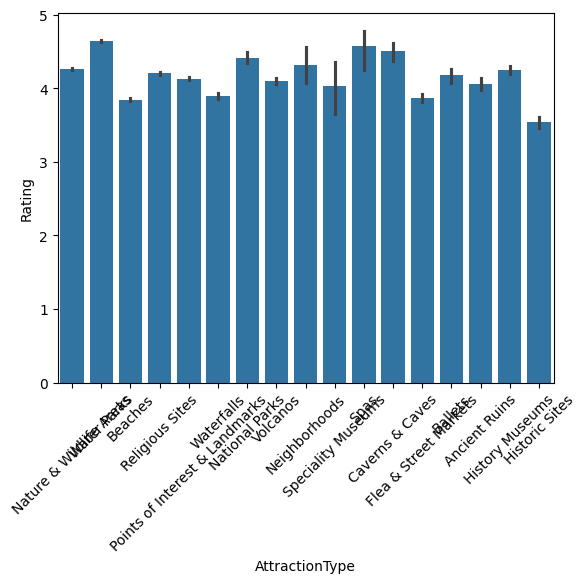

In [41]:
sns.barplot(data=df, x="AttractionType", y="Rating")
plt.xticks(rotation=45)
plt.show()


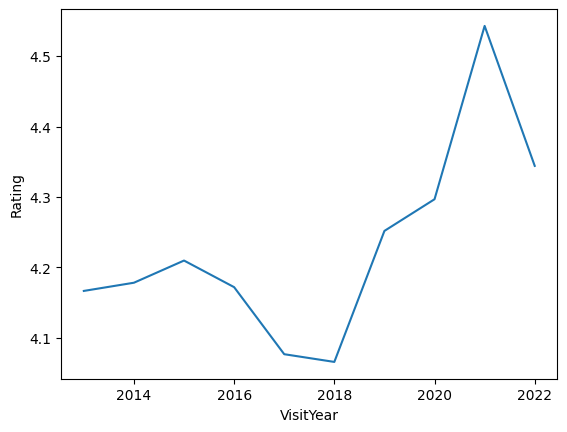

In [42]:
sns.lineplot(data=df.groupby('VisitYear')['Rating'].mean().reset_index(),x='VisitYear', y='Rating')
plt.show()

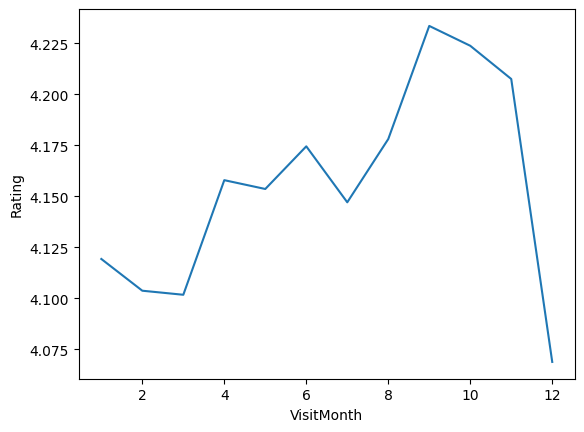

In [43]:
sns.lineplot(data=df.groupby('VisitMonth')['Rating'].mean().reset_index(), x='VisitMonth', y='Rating')
plt.show()

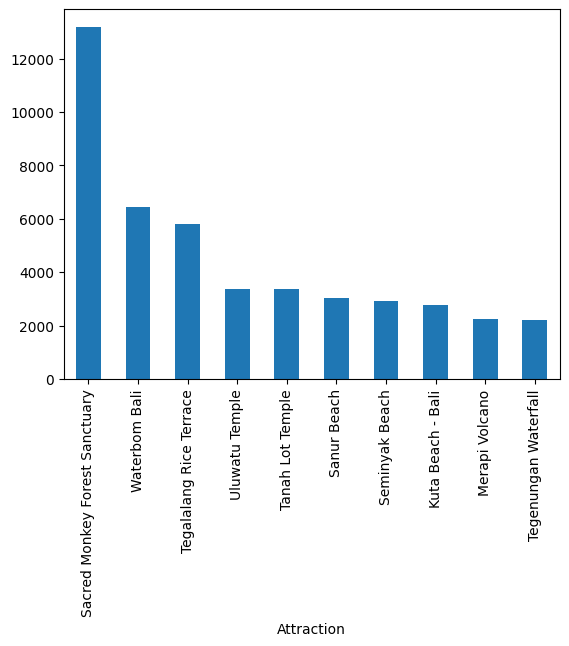

In [44]:
top_attr = df['Attraction'].value_counts().head(10)
top_attr.plot(kind='bar')
plt.show()


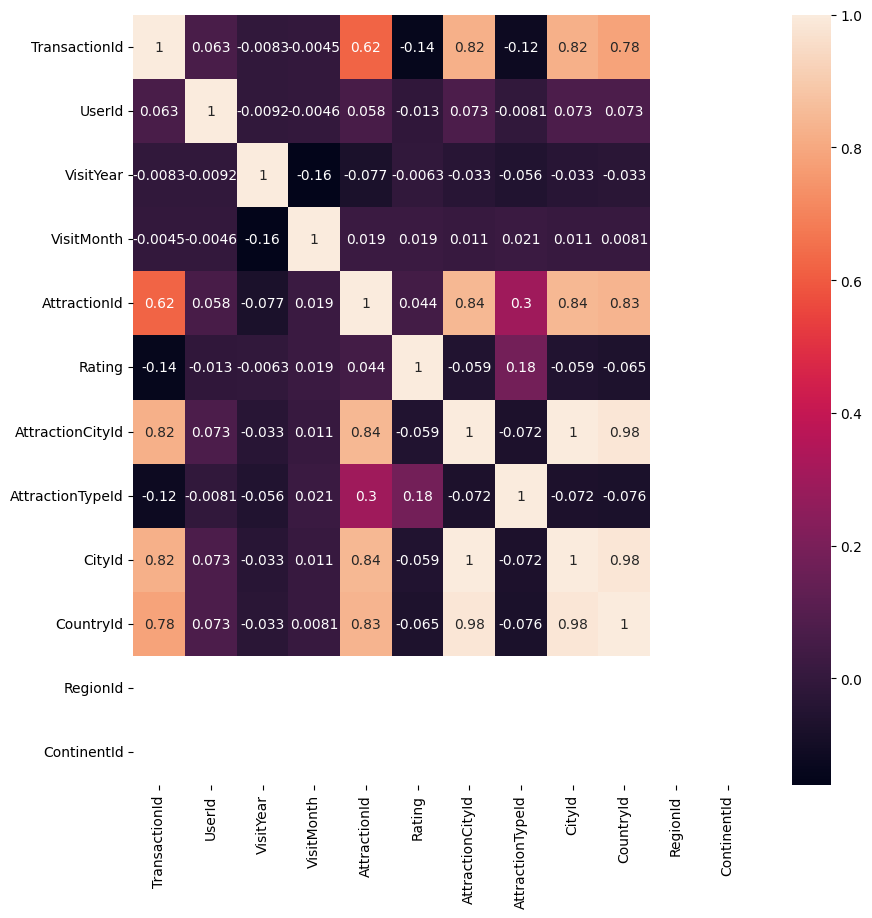

In [45]:
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(), annot=True)
plt.show()

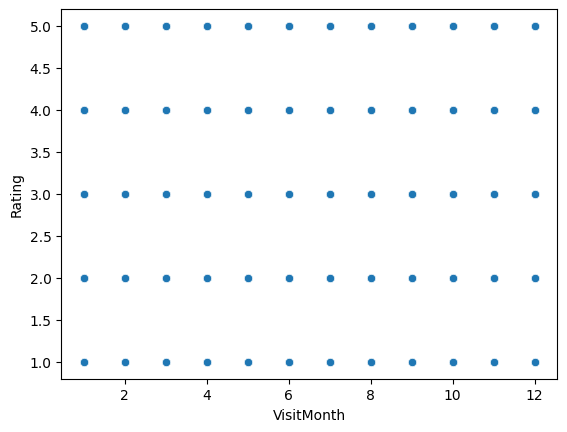

In [46]:
sns.scatterplot(data=df, x='VisitMonth', y='Rating')
plt.show()

# Regression Model (Predict Rating)

In [47]:
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

model = RandomForestRegressor()
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [49]:
model.score(X_train,y_train)*100 , model.score(X_test,y_test)*100

(86.6908820905512, 5.711002482981476)

In [50]:
dataset = pd.read_csv(r"C:\Users\RAJ\Desktop\labmentix\Tourist_experience_analytics\Tourism_Experience_Analytics\data\processed\final_cleaned_dataset.csv")


In [51]:
dataset.head(3)

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,CityId,CityName,CountryId,Country,RegionId,Region,ContinentId,Continent,TravelGroupType
0,3,70456,2022,10,640,5,1.0,63.0,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Cameroon,1,Central Africa,1.0,Africa,Couples
1,8,7567,2022,10,640,5,1.0,63.0,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Cameroon,1,Central Africa,1.0,Africa,Friends
2,9,79069,2022,10,640,5,1.0,63.0,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Cameroon,1,Central Africa,1.0,Africa,Family


In [60]:
from sklearn.linear_model import LinearRegression

In [69]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [70]:
dataset.isnull().sum()

TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
CityId               0
CityName             0
CountryId            0
Country              0
RegionId             0
Region               0
ContinentId          0
Continent            0
TravelGroupType      0
dtype: int64

In [71]:
lr1.score(X_train,y_train)*100 ,lr1.score(X_test,y_test)*100

(6.5564688434592515, 7.279325145532578)

In [72]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [73]:
r = Ridge()
r.fit(X_train,y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [74]:
r.score(X_train,y_train)*100 ,r.score(X_test,y_test)*100

(6.556468555158967, 7.279437311704706)

In [75]:
l = Lasso()
l.fit(X_train,y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [76]:
l.score(X_train,y_train)*100 ,l.score(X_test,y_test)*100

(5.439415344332421, 6.283316278657491)

In [77]:
en = ElasticNet()
en.fit(X_train,y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",1.0
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [78]:
en.score(X_train,y_train)*100 ,en.score(X_test,y_test)*100

(5.552882352635946, 6.472852418195918)

In [79]:
en.score(X_train,y_train)*100 ,en.score(X_test,y_test)*100

(5.552882352635946, 6.472852418195918)

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [81]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [82]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3,5,7,9,12],
    'min_samples_split': [5,10,20],
    'min_samples_leaf': [2,5,10],
    'max_features': ['sqrt','log2',None]
}

In [83]:
grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train,y_train)

print(grid.best_params_)

{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [84]:
best_model = grid.best_estimator_

In [85]:
p = DecisionTreeRegressor(max_depth=12,max_features=None,min_samples_split=5,min_samples_leaf=2,random_state=42)
p.fit(X_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_lea

In [86]:
p.score(X_train,y_train)*100 ,p.score(X_test,y_test)*100

(25.855663730909928, 3.511628887514817)

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train,y_train)

print("Train:",rf.score(X_train,y_train)*100)
print("Test:",rf.score(X_test,y_test)*100)

Train: 38.74561400047693
Test: 12.970659375326044


In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train,y_train)

print("Train:",gbr.score(X_train,y_train)*100)
print("Test:",gbr.score(X_test,y_test)*100)

Train: 18.345247188769033
Test: 13.375683847773335


In [89]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [90]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

print("Train:", xgb.score(X_train, y_train))
print("Test:", xgb.score(X_test, y_test))

Train: 0.2901632785797119
Test: 0.13482117652893066


In [91]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [92]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=-1,
    random_state=42
)

lgb.fit(X_train, y_train)

print("Train:", lgb.score(X_train, y_train))
print("Test:", lgb.score(X_test, y_test))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 42344, number of used features: 15
[LightGBM] [Info] Start training from score 4.157732
Train: 0.2481534032247681
Test: 0.13448031621403345


In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Scale data (important for SVR, KNN, Linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

for name, model in models.items():
    if name in ["SVR", "KNN", "Linear Regression", "Ridge", "Lasso"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    print(name, "R2 Score:", r2_score(y_test, preds))

Linear Regression R2 Score: 0.07279325145532944
Ridge R2 Score: 0.07279415100449438
Lasso R2 Score: -2.9001703705233695e-08
Decision Tree R2 Score: -0.658817364589553
Random Forest R2 Score: 0.06337465543345266
Extra Trees R2 Score: -0.06201791697391901
Gradient Boosting R2 Score: 0.13396461784687907
SVR R2 Score: 0.06624569451225093
KNN R2 Score: -0.019558655148234516


In [94]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Scale data (important for SVR, KNN, Linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

for name, model in models.items():
    if name in ["SVR", "KNN", "Linear Regression", "Ridge", "Lasso"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    print(name, "R2 Score:", r2_score(y_test, preds))

Linear Regression R2 Score: 0.07279325145532944
Ridge R2 Score: 0.07279415100449438
Lasso R2 Score: -2.9001703705233695e-08
Decision Tree R2 Score: -0.658817364589553
Random Forest R2 Score: 0.06337465543345266
Extra Trees R2 Score: -0.06201791697391901
Gradient Boosting R2 Score: 0.13396461784687907
SVR R2 Score: 0.06624569451225093
KNN R2 Score: -0.019558655148234516


In [95]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [97]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# calculate mutual information scores
mi = mutual_info_regression(X_train, y_train)

mi_scores = pd.Series(mi, index=X_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [98]:
top_features = mi_scores.index[:7]

X_train_selected = X_train[top_features]
X_test_selected  = X_test[top_features]

In [99]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    random_state=42
)

rf.fit(X_train_selected, y_train)

print("Train:", rf.score(X_train_selected,y_train))
print("Test:", rf.score(X_test_selected,y_test))

Train: 0.3957860690749071
Test: 0.10746712666684655


In [100]:
scaler = StandardScaler()

X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

In [101]:
rf.fit(X_train_selected, y_train)

print("Train:", rf.score(X_train_selected,y_train))
print("Test:", rf.score(X_test_selected,y_test))

Train: 0.3957860690749071
Test: 0.10746712666684655


In [102]:
y = df['TravelGroupType']
X = df.drop('TravelGroupType', axis=1)

In [103]:
y = df['TravelGroupType']
X = df.drop('TravelGroupType', axis=1)

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)

rf.fit(X_train, y_train)

print("Train:", rf.score(X_train,y_train))
print("Test:", rf.score(X_test,y_test))

Train: 1.0
Test: 0.44029850746268656


In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

rf.fit(X_train, y_train)

print("Train:", rf.score(X_train,y_train))
print("Test:", rf.score(X_test,y_test))

Train: 0.5132013980729265
Test: 0.4708105044398262


In [106]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',   # 🔥 IMPORTANT
    random_state=42
)

rf.fit(X_train, y_train)

print("Train:", rf.score(X_train,y_train))
print("Test:", rf.score(X_test,y_test))

Train: 0.46667768751180805
Test: 0.36652182127337996


In [107]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.13      0.36      0.19       253
           2       0.08      0.29      0.13       407
           3       0.21      0.29      0.25      1546
           4       0.40      0.31      0.35      3593
           5       0.60      0.44      0.51      4787

    accuracy                           0.37     10586
   macro avg       0.28      0.34      0.28     10586
weighted avg       0.44      0.37      0.39     10586



In [108]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [109]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before:", Counter(y_train))

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("After:", Counter(y_train_bal))

Before: Counter({5: 19149, 4: 14373, 3: 6184, 2: 1628, 1: 1010})
After: Counter({3: 19149, 4: 19149, 5: 19149, 1: 19149, 2: 19149})


In [110]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train_bal, y_train_bal)

print("Train:", gb.score(X_train_bal, y_train_bal))
print("Test:", gb.score(X_test, y_test))

Train: 0.4656848921614706
Test: 0.4181938409219724


In [111]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [112]:


y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: -0.019462416272909566
MSE: 0.9606385792556206


In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train_bal)
y_test_enc = le.transform(y_test)

In [114]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',
    num_class=5
)

xgb.fit(X_train_bal, y_train_enc)

print("Train:", xgb.score(X_train_bal, y_train_enc)*100)
print("Test:", xgb.score(X_test, y_test_enc)*100)

Train: 64.55898480338399
Test: 44.70054789344417


In [115]:
from sklearn.metrics import classification_report

y_pred = xgb.predict(X_test)

print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.24      0.23       253
           1       0.11      0.08      0.09       407
           2       0.27      0.14      0.19      1546
           3       0.39      0.38      0.39      3593
           4       0.53      0.63      0.58      4787

    accuracy                           0.45     10586
   macro avg       0.31      0.30      0.30     10586
weighted avg       0.42      0.45      0.43     10586



In [116]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

In [117]:
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    random_state=42
)

In [144]:
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_bal, y_train_enc)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.7, 0.8], 'learning_rate': [0.05, 0.1], 'max_depth': [4, 6, ...], 'n_estimators': [200, 300], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter

In [150]:
best_model = grid.best_estimator_

print("Train:", best_model.score(X_train_bal, y_train_enc)*100)
# print("Test:", best_model.score(X_test, y_pred)*100)

Train: 75.68535804748535


In [151]:
X_train = pd.get_dummies(X_train)
X_test  = pd.get_dummies(X_test)

In [152]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [155]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [158]:
y_train_enc = pd.get_dummies(y_train)

In [159]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [161]:
best_model.fit(X_train, y_train_enc)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [162]:
y_pred = best_model.predict(X_test)

print("R2:", r2_score(y_test_enc, y_pred)*100)
print("MSE:", mean_squared_error(y_test_enc, y_pred)*100)

R2: -29.573988914489746
MSE: 122.03488349914551


In [169]:
best_model.predict(X_test)

array([2.2593265, 2.062313 , 2.8364964, ..., 3.46584  , 3.2156832,
       3.885714 ], shape=(10586,), dtype=float32)

In [170]:
attraction_avg_rating = df.groupby('AttractionId')['Rating'].mean()

df['AttractionAvgRating'] = df['AttractionId'].map(attraction_avg_rating)

In [171]:
city_avg_rating = df.groupby('CityId')['Rating'].mean()

df['CityAvgRating'] = df['CityId'].map(city_avg_rating)

In [172]:
type_avg_rating = df.groupby('AttractionTypeId')['Rating'].mean()

df['TypeAvgRating'] = df['AttractionTypeId'].map(type_avg_rating)

In [173]:
user_avg_rating = df.groupby('UserId')['Rating'].mean()

df['UserAvgRating'] = df['UserId'].map(user_avg_rating)

In [174]:
X = df.drop('Rating', axis=1)
y = df['Rating']

In [175]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

print("Train:", xgb.score(X_train, y_train))
print("Test:", xgb.score(X_test, y_test))

Train: 0.8084649443626404
Test: -0.3546786308288574


In [176]:
from sklearn.model_selection import train_test_split

X = df.drop('Rating', axis=1)
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [177]:
train_df = X_train.copy()
train_df['Rating'] = y_train

In [178]:
attr_mean = train_df.groupby('AttractionId')['Rating'].mean()

X_train['AttrAvg'] = X_train['AttractionId'].map(attr_mean)
X_test['AttrAvg']  = X_test['AttractionId'].map(attr_mean)

In [179]:
city_mean = train_df.groupby('CityId')['Rating'].mean()

X_train['CityAvg'] = X_train['CityId'].map(city_mean)
X_test['CityAvg']  = X_test['CityId'].map(city_mean)

In [180]:
user_mean = train_df.groupby('UserId')['Rating'].mean()

X_train['UserAvg'] = X_train['UserId'].map(user_mean)
X_test['UserAvg']  = X_test['UserId'].map(user_mean)

# =========================================
# CLASSIFICATION MODEL – CLEAN VERSION
# =========================================

In [182]:
df_model = df.copy()

df_model = df_model.drop(columns=[
    'AttractionCityId',
    'AttractionTypeId',
    'CityId',
    'CountryId',
    'RegionId',
    'ContinentId'
], errors='ignore')

df_model.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent,TravelGroupType,AttractionAvgRating,CityAvgRating,TypeAvgRating,UserAvgRating
0,3,70456,2022,10,640,5,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,Cameroon,Central Africa,Africa,Couples,4.267086,4.178636,4.266848,5.0
1,8,7567,2022,10,640,5,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,Cameroon,Central Africa,Africa,Friends,4.267086,4.178636,4.266848,5.0
2,9,79069,2022,10,640,5,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,Cameroon,Central Africa,Africa,Family,4.267086,4.178636,4.266848,5.0
3,10,31019,2022,10,640,3,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,Cameroon,Central Africa,Africa,Family,4.267086,4.178636,4.266848,3.0
4,15,43611,2022,10,640,3,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,Cameroon,Central Africa,Africa,Couples,4.267086,4.178636,4.266848,3.0


In [183]:
# =====================================================
# FINAL CLEAN CLASSIFICATION PIPELINE
# =====================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------------------------------
# 1️⃣ Feature Selection
# -----------------------------------------------------

selected_features = [
    'VisitYear',
    'VisitMonth',
    'Rating',
    'AttractionType',
    'Country',
    'Region',
    'Continent'
]

X = df_model[selected_features]
y = df_model['TravelGroupType']

# -----------------------------------------------------
# 2️⃣ Encode Target
# -----------------------------------------------------

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# -----------------------------------------------------
# 3️⃣ One-Hot Encode Features
# -----------------------------------------------------

X_encoded = pd.get_dummies(X)

# -----------------------------------------------------
# 4️⃣ Train-Test Split
# -----------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# -----------------------------------------------------
# 5️⃣ Model (Tuned RandomForest)
# -----------------------------------------------------

clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=15,
    min_samples_split=8,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

# -----------------------------------------------------
# 6️⃣ Evaluation
# -----------------------------------------------------

print("Train Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

print("\nClassification Report:\n")
print(classification_report(y_test, clf.predict(X_test), target_names=le.classes_))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, clf.predict(X_test)))

Train Accuracy: 0.39719913092764025
Test Accuracy: 0.31985641413187227

Classification Report:

              precision    recall  f1-score   support

    Business       0.03      0.32      0.05       125
     Couples       0.48      0.36      0.41      4324
      Family       0.49      0.35      0.41      3043
     Friends       0.28      0.21      0.24      2189
        Solo       0.13      0.29      0.18       905

    accuracy                           0.32     10586
   macro avg       0.28      0.31      0.26     10586
weighted avg       0.41      0.32      0.35     10586


Confusion Matrix:

[[  40   29   17   18   21]
 [ 594 1563  643  654  870]
 [ 442  756 1063  355  427]
 [ 325  666  333  459  406]
 [ 137  267  101  139  261]]


In [184]:
print(df_model.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId',
       'Rating', 'Attraction', 'AttractionAddress', 'AttractionType',
       'CityName', 'Country', 'Region', 'Continent', 'TravelGroupType',
       'AttractionAvgRating', 'CityAvgRating', 'TypeAvgRating',
       'UserAvgRating'],
      dtype='object')


In [185]:
# X = df_model.drop('TravelGroupType', axis=1)
# y = df_model['TravelGroupType']

In [186]:
# Select only meaningful features
selected_features = [
    'VisitYear',
    'VisitMonth',
    'Rating',
    'AttractionType',
    'Country',
    'Region',
    'Continent'
]

X = df_model[selected_features]
y = df_model['TravelGroupType']

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [188]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [192]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [193]:
clf.score(X_train,y_train)* 100 ,clf.score(X_test,y_test)* 100 

(38.43047421122237, 34.34725108634045)

In [194]:
from sklearn.metrics import accuracy_score

print("Train Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train Accuracy: 0.3843047421122237
Test Accuracy: 0.3434725108634045


In [195]:
print(y.value_counts())

TravelGroupType
Couples     21620
Family      15217
Friends     10945
Solo         4525
Business      623
Name: count, dtype: int64


In [196]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# One-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Model
model = HistGradientBoostingClassifier(
    max_depth=10,
    learning_rate=0.05,
    max_iter=400,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))

print(classification_report(y_test, model.predict(X_test), target_names=le.classes_))

Train Accuracy: 0.4815322123559418
Test Accuracy: 0.4665596070281504
              precision    recall  f1-score   support

    Business       0.00      0.00      0.00       125
     Couples       0.46      0.86      0.60      4324
      Family       0.55      0.30      0.39      3043
     Friends       0.37      0.13      0.19      2189
        Solo       0.25      0.01      0.02       905

    accuracy                           0.47     10586
   macro avg       0.33      0.26      0.24     10586
weighted avg       0.44      0.47      0.40     10586



In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Model
clf = RandomForestClassifier(
    n_estimators=500,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

print(classification_report(y_test, clf.predict(X_test), target_names=le.classes_))

Train Accuracy: 0.38619402985074625
Test Accuracy: 0.32627999244284905
              precision    recall  f1-score   support

    Business       0.03      0.37      0.05       125
     Couples       0.48      0.44      0.46      4324
      Family       0.53      0.31      0.39      3043
     Friends       0.29      0.16      0.20      2189
        Solo       0.13      0.26      0.17       905

    accuracy                           0.33     10586
   macro avg       0.29      0.31      0.25     10586
weighted avg       0.42      0.33      0.36     10586



# Classification Model (Visit Mode Prediction)

In [198]:

# ================================
# STEP 2 — Copy Dataframe
# ================================
df_encoded = df.copy()

# ================================
# STEP 3 — Encode Categorical Columns
# ================================
le = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

# ================================
# STEP 4 — Define X and y
# ================================
X = df_encoded.drop('TravelGroupType', axis=1)
y = df_encoded['TravelGroupType']

# ================================
# STEP 5 — Train Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# STEP 6 — Train Random Forest Model
# ================================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ================================
# STEP 7 — Prediction
# ================================
pred = clf.predict(X_test)

# ================================
# STEP 8 — Evaluation
# ================================
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n")
print(classification_report(y_test, pred))

Accuracy: 0.45749102588324203

Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.19      0.28       130
           1       0.49      0.66      0.56      4290
           2       0.46      0.42      0.44      3079
           3       0.35      0.25      0.29      2171
           4       0.34      0.15      0.21       916

    accuracy                           0.46     10586
   macro avg       0.43      0.34      0.36     10586
weighted avg       0.44      0.46      0.44     10586



# Recommendation System

In [199]:
user_item_matrix = df.pivot_table(index='UserId',
                                   columns='AttractionId',
                                   values='Rating').fillna(0)

similarity = cosine_similarity(user_item_matrix)

def recommend(user_id, n=5):
    user_index = user_item_matrix.index.get_loc(user_id)
    sim_scores = list(enumerate(similarity[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    users = [user_item_matrix.index[i[0]] for i in sim_scores]
    return users

* Content-Based Filtering

In [200]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import pandas as pd

# Step 1: Unique attractions only
attraction_df = df[['AttractionId','Attraction','AttractionTypeId']].drop_duplicates()

# Step 2: One hot encoding attraction type
content_matrix = pd.get_dummies(attraction_df['AttractionTypeId'])

# Step 3: Convert to sparse matrix (VERY IMPORTANT)
sparse_content = csr_matrix(content_matrix.values)

# Step 4: Cosine similarity on attractions
cos_sim = cosine_similarity(sparse_content)

# Step 5: Mapping attraction id to index
indices = pd.Series(attraction_df.index, index=attraction_df['AttractionId']).drop_duplicates()

# Step 6: Recommendation function
def recommend_content(attraction_id):
    
    idx = indices[attraction_id]
    
    sim_scores = list(enumerate(cos_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)[1:6]
    
    attraction_indices = [i[0] for i in sim_scores]
    
    return attraction_df.iloc[attraction_indices]['Attraction']

In [201]:
import pickle

with open("../models/regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [202]:
df.to_csv("../data/processed/final_cleaned_dataset.csv", index=False)

In [203]:
with open("../models/classification_model.pkl", "wb") as f:
    pickle.dump(clf, f)